In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 1: Load and Clean Data
data = pd.read_csv('/content/drive/MyDrive/crop prediction/yield_df.csv')
data

,ID,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657,2550.07,19.76


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  int64  
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 1.7+ MB


In [ ]:
data.drop('ID',axis=1,inplace=True)


In [ ]:
data.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485,121.0,16.37
1,Albania,Potatoes,1990,66667,1485,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485,121.0,16.37
3,Albania,Sorghum,1990,12500,1485,121.0,16.37
4,Albania,Soybeans,1990,7000,1485,121.0,16.37


In [ ]:
data.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [ ]:
data.isnull().sum()

,0
Area,0
Item,0
Year,0
hg/ha_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,0


In [ ]:
data.duplicated().sum()

2310

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.dtypes

,0
Area,object
Item,object
Year,int64
hg/ha_yield,int64
average_rain_fall_mm_per_year,int64
pesticides_tonnes,float64
avg_temp,float64


In [ ]:
data['average_rain_fall_mm_per_year'] = data['average_rain_fall_mm_per_year'].astype(np.float64)


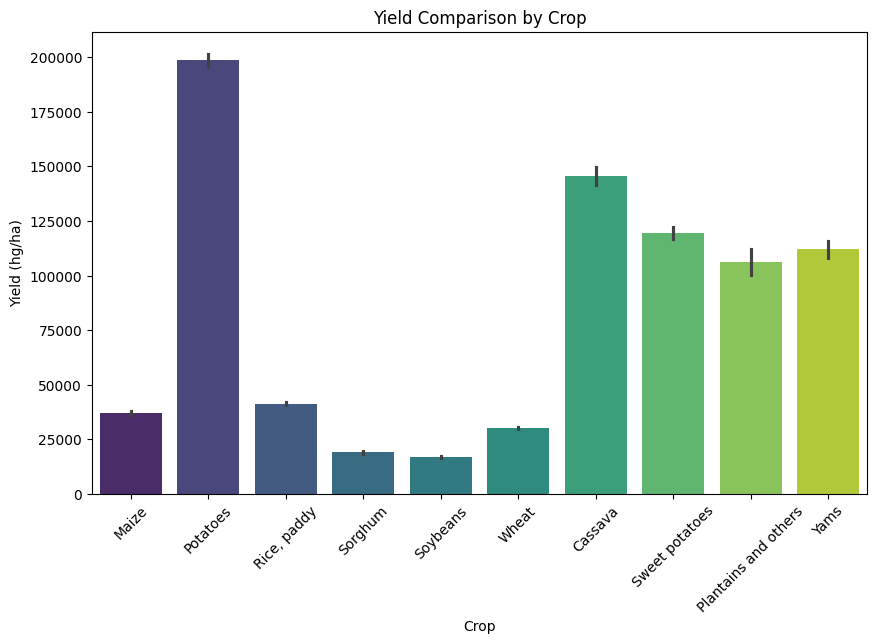

In [ ]:
# 1. Yield Comparison by Crop (Bar Chart)
plt.figure(figsize=(10, 6))
sns.barplot(x="Item", y="hg/ha_yield", data=data, palette="viridis")
plt.title("Yield Comparison by Crop")
plt.xlabel("Crop")
plt.ylabel("Yield (hg/ha)")
plt.xticks(rotation=45)
plt.show()

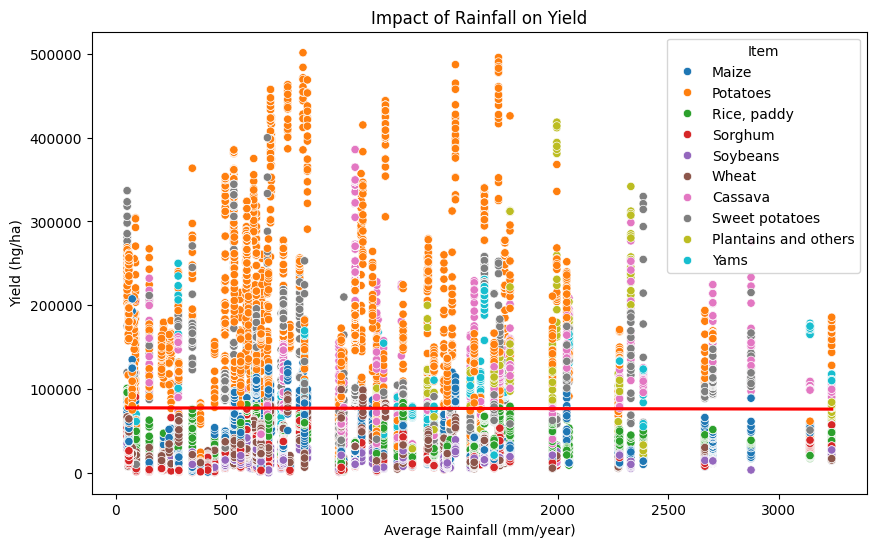

In [ ]:
# 2. Impact of Rainfall on Yield (Scatter Plot with Trendline)
plt.figure(figsize=(10, 6))
sns.scatterplot(x="average_rain_fall_mm_per_year", y="hg/ha_yield", hue="Item", data=data, palette="tab10")
sns.regplot(x="average_rain_fall_mm_per_year", y="hg/ha_yield", data=data, scatter=False, color="red", ci=None)
plt.title("Impact of Rainfall on Yield")
plt.xlabel("Average Rainfall (mm/year)")
plt.ylabel("Yield (hg/ha)")
plt.show()

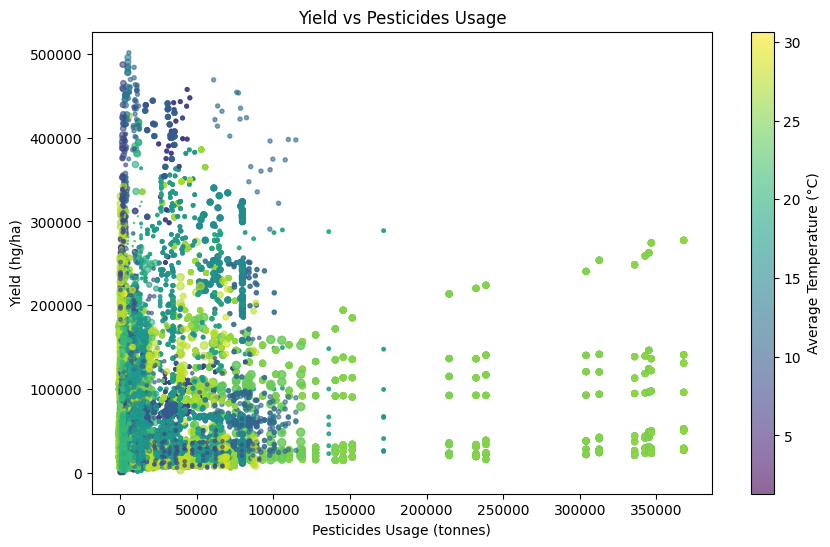

In [ ]:
# 3. Yield vs. Pesticides Usage (Bubble Chart)
plt.figure(figsize=(10, 6))

# Scale down the bubble sizes by multiplying with a smaller factor
bubble_sizes = (data["average_rain_fall_mm_per_year"] / 10) * 0.1

# Change the color map to 'viridis' or any other you prefer
plt.scatter(data["pesticides_tonnes"], data["hg/ha_yield"],
            s=bubble_sizes, alpha=0.6,
            c=data["avg_temp"], cmap="viridis")  # Change colormap here
plt.colorbar(label="Average Temperature (°C)")  # Add color bar with label
plt.title("Yield vs Pesticides Usage")
plt.xlabel("Pesticides Usage (tonnes)")
plt.ylabel("Yield (hg/ha)")

# Show the plot
plt.show()


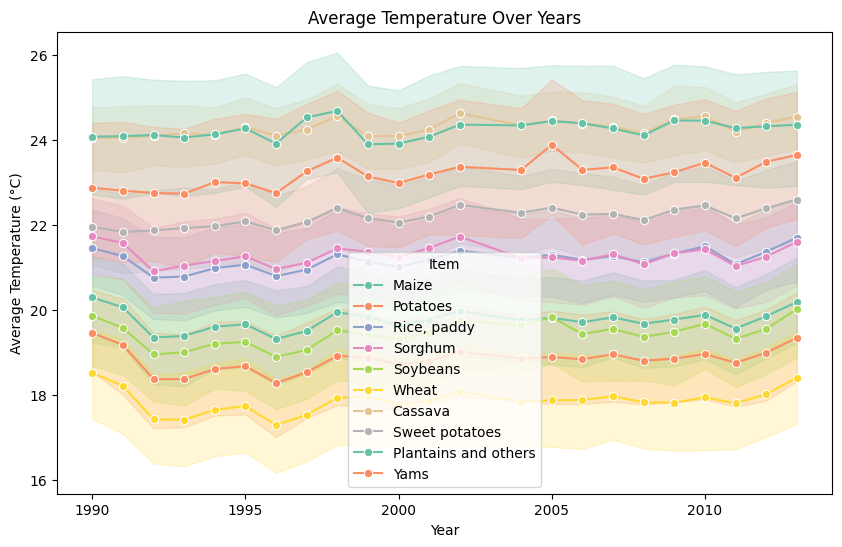

In [ ]:
# 4. Average Temperature Analysis (Line Chart)
plt.figure(figsize=(10, 6))
sns.lineplot(x="Year", y="avg_temp", hue="Item", data=data, marker="o", palette="Set2")
plt.title("Average Temperature Over Years")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.show()

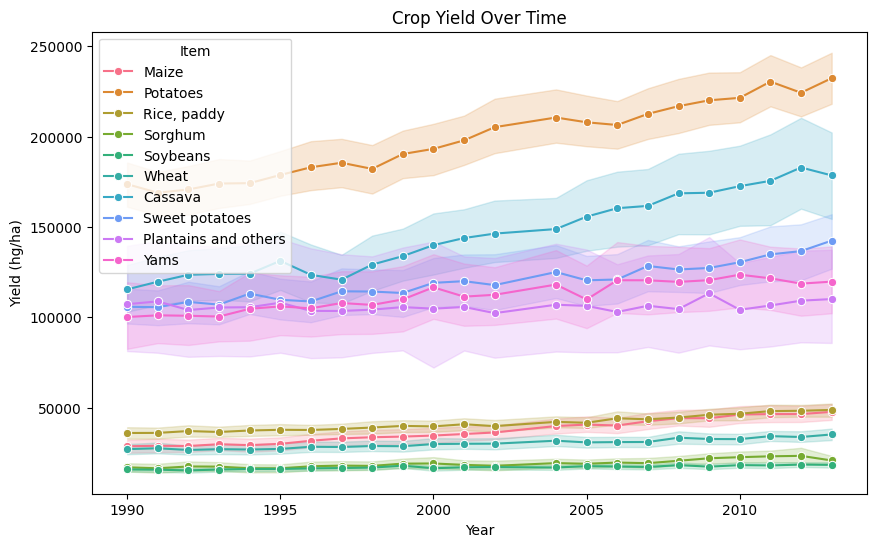

In [ ]:


# 5. Crop Yield Over Time (Line Chart)
plt.figure(figsize=(10, 6))
sns.lineplot(x="Year", y="hg/ha_yield", hue="Item", data=data, marker="o", palette="husl")
plt.title("Crop Yield Over Time")
plt.xlabel("Year")
plt.ylabel("Yield (hg/ha)")
plt.show()


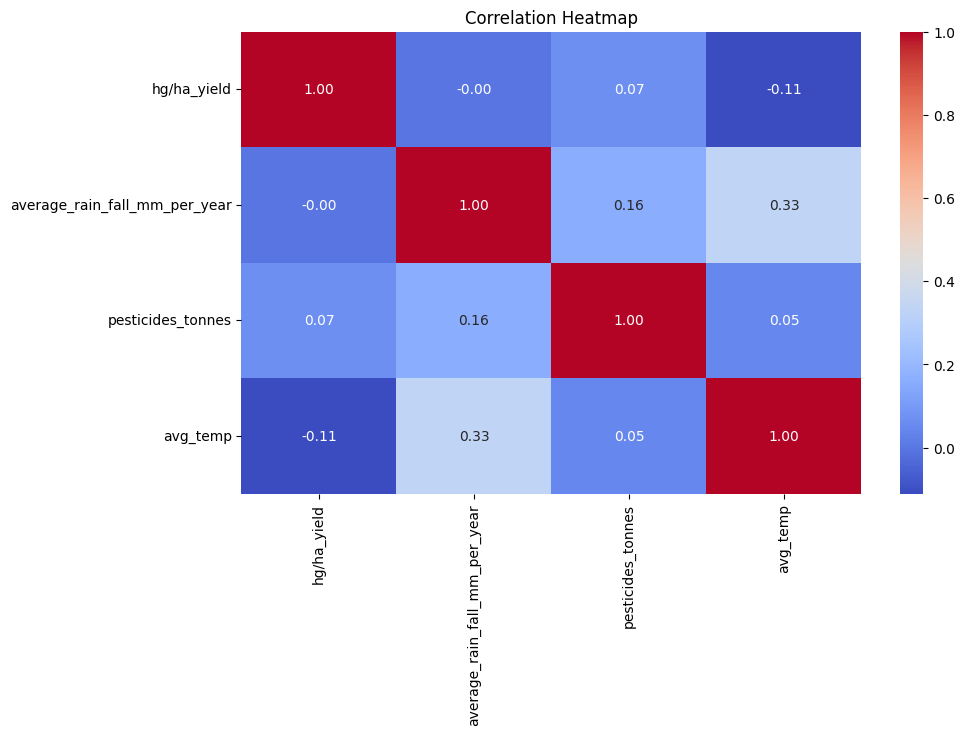

In [ ]:
# 6. Correlation Heatmap
plt.figure(figsize=(10, 6))
corr_matrix = data[["hg/ha_yield", "average_rain_fall_mm_per_year", "pesticides_tonnes", "avg_temp"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

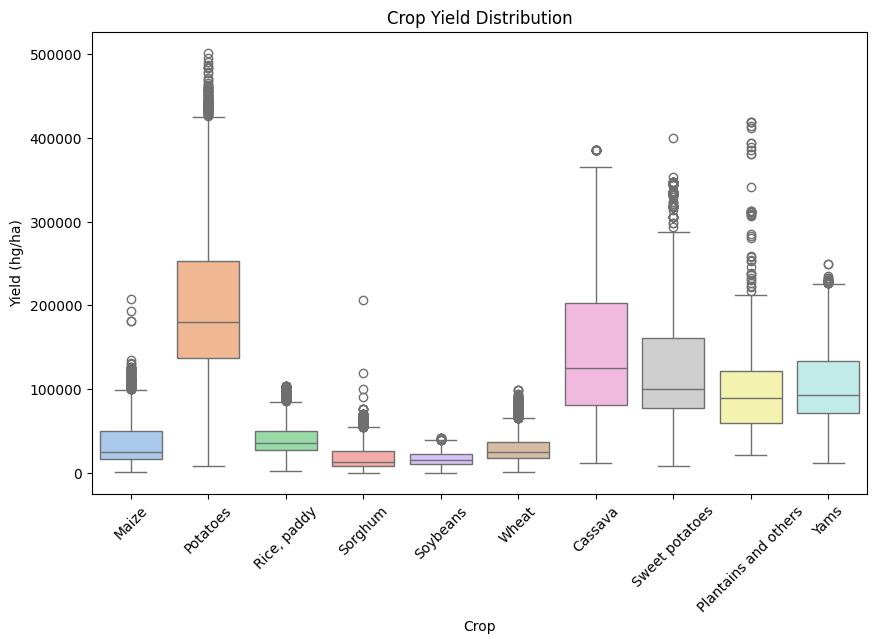

In [ ]:
# 7. Crop Yield Distribution (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x="Item", y="hg/ha_yield", data=data, palette="pastel")
plt.title("Crop Yield Distribution")
plt.xlabel("Crop")
plt.ylabel("Yield (hg/ha)")
plt.xticks(rotation=45)
plt.show()

**Train Test split Rearranging Columns**

In [ ]:
col = ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']
data = data[col]
data

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.00,16.37,Albania,Maize,36613
1,1990,1485.0,121.00,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.00,16.37,Albania,"Rice, paddy",23333
3,1990,1485.0,121.00,16.37,Albania,Sorghum,12500
4,1990,1485.0,121.00,16.37,Albania,Soybeans,7000
...,...,...,...,...,...,...,...
28237,2013,657.0,2550.07,19.76,Zimbabwe,"Rice, paddy",22581
28238,2013,657.0,2550.07,19.76,Zimbabwe,Sorghum,3066
28239,2013,657.0,2550.07,19.76,Zimbabwe,Soybeans,13142
28240,2013,657.0,2550.07,19.76,Zimbabwe,Sweet potatoes,22222


In [ ]:
X= data.iloc[:, :-1]
X

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item
0,1990,1485.0,121.00,16.37,Albania,Maize
1,1990,1485.0,121.00,16.37,Albania,Potatoes
2,1990,1485.0,121.00,16.37,Albania,"Rice, paddy"
3,1990,1485.0,121.00,16.37,Albania,Sorghum
4,1990,1485.0,121.00,16.37,Albania,Soybeans
...,...,...,...,...,...,...
28237,2013,657.0,2550.07,19.76,Zimbabwe,"Rice, paddy"
28238,2013,657.0,2550.07,19.76,Zimbabwe,Sorghum
28239,2013,657.0,2550.07,19.76,Zimbabwe,Soybeans
28240,2013,657.0,2550.07,19.76,Zimbabwe,Sweet potatoes


In [ ]:
y = data.iloc[:, -1]
y

,hg/ha_yield
0,36613
1,66667
2,23333
3,12500
4,7000
...,...
28237,22581
28238,3066
28239,13142
28240,22222


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Identify numeric and categorical columns
numeric_features = ['Year','average_rain_fall_mm_per_year','pesticides_tonnes','avg_temp']  # Replace with actual numeric column names
categorical_features = ['Area','Item']  # Replace with actual categorical column names

preprocesser = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), numeric_features),  # Standard scaling for numeric columns
        ('encode', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features),  # Encoding for categorical columns
    ],
    remainder='passthrough'  # Keep other columns unchanged
)


In [ ]:
# Apply preprocessing to data
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

# Define hyperparameter grids
param_grids = {
     'DecisionTreeRegressor': {
         'max_depth': [5, 10, 15, None],
         'min_samples_split': [2, 5, 10],
         'min_samples_leaf': [1, 2, 5]
      }
}

# Initialize models
model = {
    'DecisionTreeRegressor': DecisionTreeRegressor()
}

# Train and evaluate models
best_model = {}
for name, model in model.items():
    print(f"Training {name}...")
    param_grid = param_grids[name]
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
    grid_search.fit(X_train_dummy, y_train)
    best_model[name] = grid_search.best_estimator_

    # Evaluate on test data
    y_pred = best_model[name].predict(X_test_dummy)
    print(f"{name}:")
    print("Best Params:", grid_search.best_params_)
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("R²:", r2_score(y_test, y_pred))
    print("-" * 50)


Training DecisionTreeRegressor...
DecisionTreeRegressor:
Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
MAE: 3841.0163871216505
R²: 0.9801300526291702
--------------------------------------------------


In [ ]:
Dtr = DecisionTreeRegressor()
Dtr.fit(X_train_dummy,y_train)
Dtr.predict(X_test_dummy)

array([35286., 22814., 19295., ..., 15011., 34879., 77391.])

In [ ]:
def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    # Create a DataFrame for the input features
    features = pd.DataFrame({
        'Year': [Year],
        'average_rain_fall_mm_per_year': [average_rain_fall_mm_per_year],
        'pesticides_tonnes': [pesticides_tonnes],
        'avg_temp': [avg_temp],
        'Area': [Area],
        'Item': [Item]
    })

    # Transform the features using the preprocessor
    transformed_features = preprocesser.transform(features)

    # Make the prediction
    predicted_yield = Dtr.predict(transformed_features)

    return predicted_yield[0]  # Extract scalar value from array

# Example input
Year = 1990
average_rain_fall_mm_per_year = 1485.0
pesticides_tonnes = 121.00
avg_temp = 16.37
Area = 'Albania'
Item = 'Maize'

# Make the prediction
result = prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)
print(f"Predicted Crop Yield (hg/ha): {result:.2f}")


Predicted Crop Yield (hg/ha): 36613.00
